Let's start by importing the important libraries for data analysis, data visualization, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's now import our training data and store in a dataframe named train_data.

In [2]:
train_data = pd.read_csv('/kaggle/input/hranalysis/train.csv')
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Let's now do some exploratory data analysis by using the pairplot feature of seaborn to get a brief idea about our dataset and its features.(Warning: this can take some time)

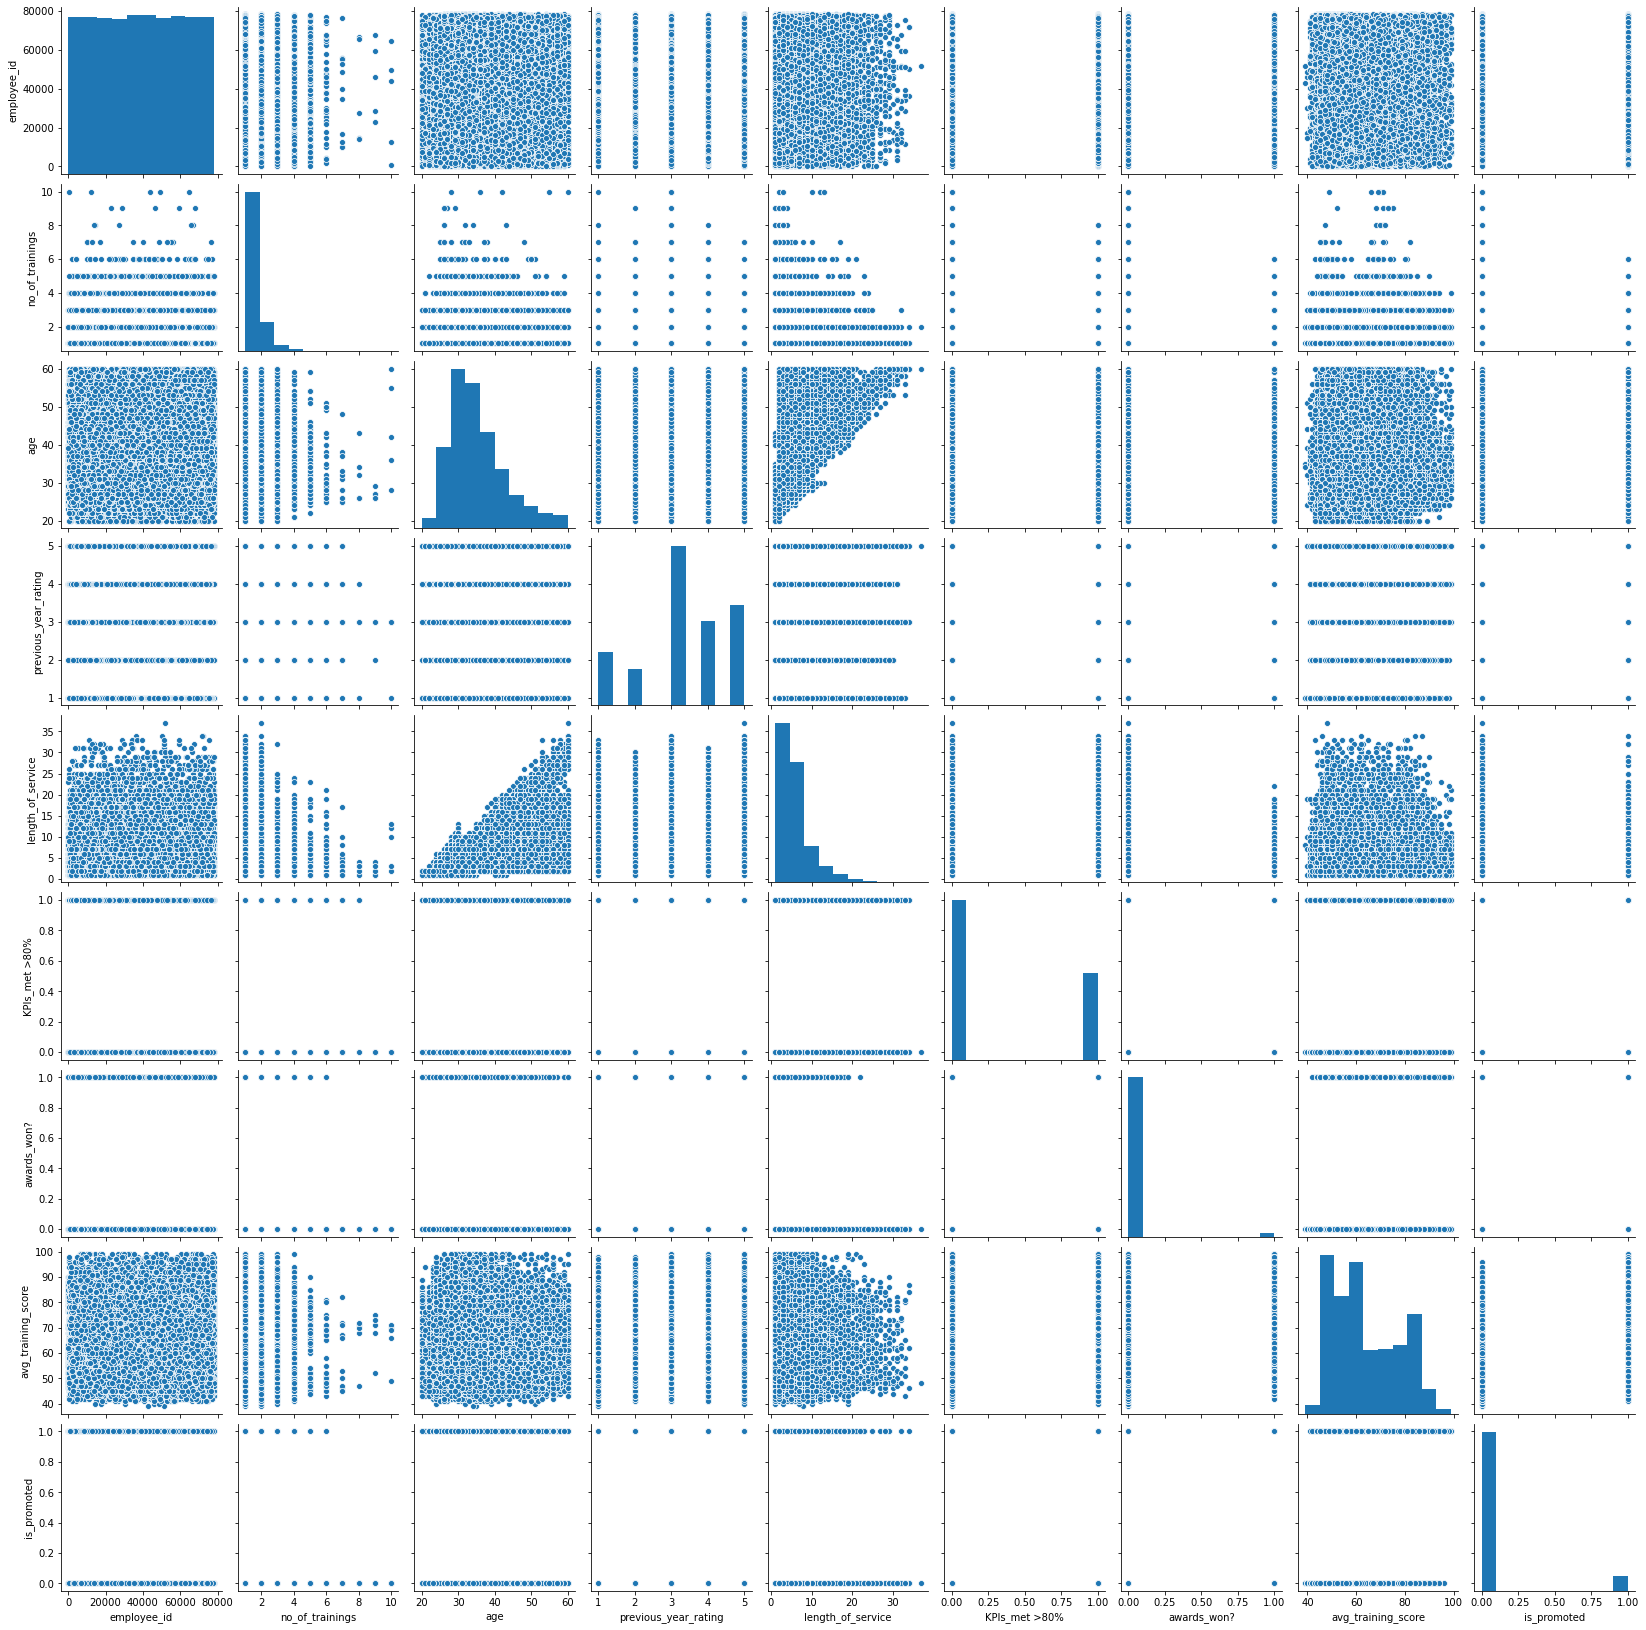

In [3]:
sns.pairplot(train_data)

Our main goal is to effectively classify our data. Feature employee_id has no contribution in this since the employee-id is not anyhow related to whether the person gets promotion or not. So we just remove that from our dataset.

In [4]:
train_data.drop('employee_id',inplace=True,axis='columns')

In [5]:
train_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Let's do some more analysis of our data by using these countlots. I have restricted myself to only 2 and rather given more time to the cleaning and improvement of our data.

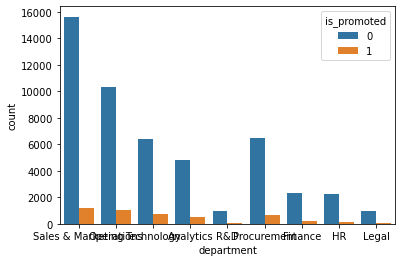

In [6]:
sns.countplot(x='department',data=train_data,hue='is_promoted')

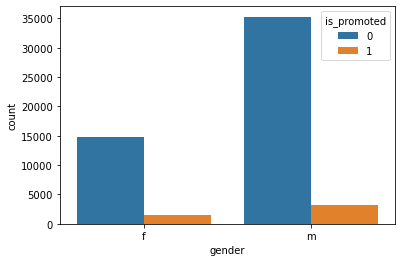

In [7]:
sns.countplot(x='gender',data=train_data,hue='is_promoted')

Let's now look for the presence of any missing values in out data and try to clean it.

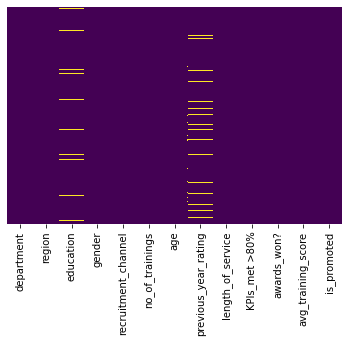

In [8]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Only 2 columns have missing data in them: education and previous_year_rating. For education, most of the entries are 'Bachelor's'. So it would make sense to actually replace all the missing values with 'Bachelor's' since they are having maximum probability. The function below will do this.

In [9]:
def fill_edu(col):
    if(pd.isnull(col)):
        return "Bachelor's"
    else:
        return col

In [10]:
train_data['education'] = train_data['education'].apply(fill_edu)

Now let's check our data.

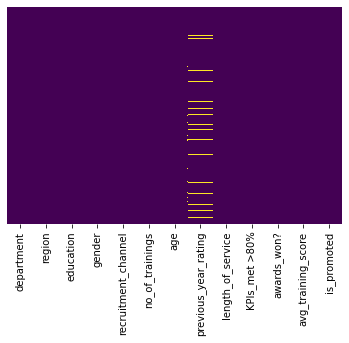

In [11]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Now that our data doesn't have any missing education values, let's try and do the same for previous_year_rating column also. Here we'll try to find the most popular rating and assign that to all missing values.

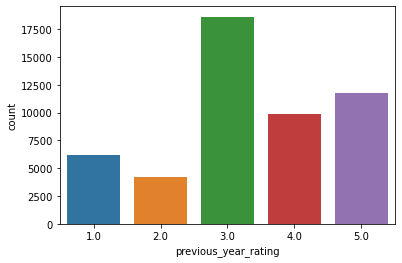

In [12]:
sns.countplot(x='previous_year_rating',data=train_data)

We can see that 3.0 is the most common rating so we will insert 3.0 for all missing values in previous_year_rating.

In [13]:
def fill_rating(col):
    if(pd.isnull(col)):
        return 3.0
    else:
        return col

In [14]:
train_data['previous_year_rating'] = train_data['previous_year_rating'].apply(fill_rating)

Let's check our dataset now.

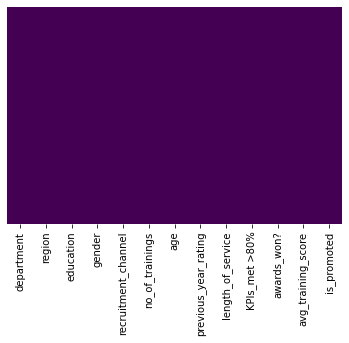

In [15]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Now our dataset has no missing values. We'll now proceeed further to convert the categorical data formats to dummies format so that our models can use them more effectively. We will use the get_dummies() method of pandas for this purpose. (Dummies can increase the precision of a model a lot instead of normal object types)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [17]:
dep = pd.get_dummies(train_data['department'],drop_first=True)
edu = pd.get_dummies(train_data['education'],drop_first=True)
reg = pd.get_dummies(train_data['region'],drop_first=True)
gen = pd.get_dummies(train_data['gender'],drop_first=True)
rec = pd.get_dummies(train_data['recruitment_channel'],drop_first=True)
dep.head()

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1


Now that we have all our dummies let's remove the object type columns and insert our dummies instead.

In [18]:
train_data.drop(['department','region','education','gender','recruitment_channel'],axis=1,inplace=True)

In [19]:
train_data = pd.concat([train_data,dep,reg,edu,gen,rec],axis=1)

In [20]:
train_data.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Finance,HR,...,region_5,region_6,region_7,region_8,region_9,Below Secondary,Master's & above,m,referred,sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now our data is ready to be fit into our model, so let's first start by doing a train_test_split to validate our model.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('is_promoted',axis=1), 
                                                    train_data['is_promoted'], test_size=0.25, 
                                                    random_state=101)

Let us now use a simple logistic regression model to classify our data. We will check its accuracy later on.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Let's predict our test data and evaluate the precision of our model now.

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12543
           1       0.65      0.14      0.23      1159

    accuracy                           0.92     13702
   macro avg       0.79      0.57      0.59     13702
weighted avg       0.90      0.92      0.90     13702



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
print(confusion_matrix(y_test,predictions))

[[12459    84]
 [ 1000   159]]


Let's try using an decision tree classifier and check its precision.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = dtree.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12543
           1       0.41      0.45      0.43      1159

    accuracy                           0.90     13702
   macro avg       0.68      0.70      0.69     13702
weighted avg       0.90      0.90      0.90     13702



In [35]:
print(confusion_matrix(y_test,predictions))
print("Training Accuracy for Decision tree classifier :", dtree.score(X_train, y_train))

[[11793   750]
 [  633   526]]
Training Accuracy for Decision tree classifier : 0.9998053812095558


As we can see that the our models are able to predict is_promoted=0 quite accurately but not as much for is_promoted=1. This is probably because the dataset doesn't have as much is_promoted=1 cases as is_promoted=0. Let's try standard scaling our data and then check the precision.(training accuracy is good but not good enough for validation accuracy)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

Let's try first for logistic regression model and test.

In [37]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel2.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12543
           1       0.82      0.26      0.39      1159

    accuracy                           0.93     13702
   macro avg       0.88      0.63      0.68     13702
weighted avg       0.93      0.93      0.92     13702



We can see that the precision of is_promoted=1 is much better here. Now lets try to do the same for a random forest classifier.

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12543
           1       0.84      0.29      0.43      1159

    accuracy                           0.94     13702
   macro avg       0.89      0.64      0.70     13702
weighted avg       0.93      0.94      0.92     13702



We can see that the random forest classifier is slightly better that logistic regression. Let us test their training accuracy to check which is better.

In [43]:
print("Training Accuracy for Random Forest classifier :", rfc.score(X_train, y_train))

Training Accuracy for Random Forest classifier : 0.9997323991631392


In [44]:
print("Training Accuracy for logistic regression classifier :", logmodel2.score(X_train, y_train))

Training Accuracy for logistic regression classifier : 0.9322726609254124


We can see that accuracy of Random forest classifier is only better. Thanks for reading upto here, if you liked my kernel please leave an upvote.